### Linear Regression [Dataset: communities.zip]


For this problem you will experiment with multiple linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv("./communities.csv", na_values = ['?'])
df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


#### a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression. Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [70]:
df.shape

(1994, 100)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [72]:
df = df.dropna()
df["OtherPerCap"] = df.OtherPerCap.astype("float")

In [73]:
#Compute and display basic statistics (mean, standard deviation, min, max, etc.) 
#for each of the variables in the data set.
pd.set_option("display.max_columns", 100)
df.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,0.064104,0.696618,0.361259,0.558314,0.291540,0.495780,0.471044,0.317546,0.479242,0.375805,0.350336,0.368073,0.291169,0.203567,0.322333,0.284742,0.386157,0.055509,0.302750,0.315695,0.383251,0.361711,0.363281,0.501229,0.396427,0.440552,0.461164,0.434451,0.487501,0.494195,0.487747,0.611124,0.620868,0.664300,0.583081,0.501405,0.526703,0.036292,0.249694,0.030075,0.320261,0.360723,0.399212,0.428038,0.181450,0.182218,0.184867,0.182970,0.785805,0.150652,0.267602,0.251897,0.462132,0.494496,0.404064,0.562619,0.186272,0.495203,0.314601,0.076829,0.719649,0.548685,0.204476,0.433211,0.494235,0.264355,0.242905,0.264792,0.263593,0.269037,0.346553,0.372614,0.423121,0.384240,0.490070,0.449759,0.403638,0.029453,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.237983
std,16.401661,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,0.128280,0.444648,0.209327,0.182820,0.204155,0.178067,0.173616,0.221951,0.167606,0.198224,0.191118,0.186848,0.171607,0.164793,0.195457,0.191008,0.183045,0.127973,0.228202,0.213354,0.202528,0.209239,0.201916,0.173940,0.202427,0.175490,0.182471,0.175481,0.175189,0.183620,0.154633,0.201817,0.206190,0.218477,0.191353,0.168642,0.175284,0.108698,0.229610,0.087209,0.219132,0.210929,0.201458,0.194889,0.235819,0.236357,0.236762,0.234846,0.226884,0.219752,0.196616,0.190756,0.169588,0.157935,0.189343,

In [74]:
df.isnull().sum()

state                  0
communityname          0
population             0
householdsize          0
racepctblack           0
                      ..
PctSameState85         0
LandArea               0
PopDens                0
PctUsePubTrans         0
ViolentCrimesPerPop    0
Length: 100, dtype: int64

In [75]:
x = df.drop(['state', 'communityname', 'ViolentCrimesPerPop'], axis = 1)
y = df['ViolentCrimesPerPop']

In [76]:
x.shape

(1993, 97)

In [77]:
x.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [78]:
y

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1993, dtype: float64

In [79]:
#Create a 20%-80% randomized split of the data. Set aside the 20% test portion; 
#the 80% training data partition will be used for cross-validation on various tasks specified below.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [80]:
X_train.shape

(1594, 97)

#### b) Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). Compute the RMSE value on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [81]:
x_train = np.array(X_train)
x_train = np.array([np.concatenate((v, [1])) for v in x_train])
x_train

array([[0.05, 0.53, 0.31, ..., 0.11, 0.05, 1.  ],
       [0.  , 0.45, 0.41, ..., 0.15, 0.06, 1.  ],
       [0.  , 0.51, 0.02, ..., 0.05, 0.05, 1.  ],
       ...,
       [0.08, 0.3 , 0.19, ..., 0.17, 0.01, 1.  ],
       [0.03, 0.49, 0.52, ..., 0.19, 0.01, 1.  ],
       [0.  , 0.3 , 0.01, ..., 0.32, 0.05, 1.  ]])

In [82]:
y_train = np.array(Y_train)
y_train

array([0.31, 0.05, 0.22, ..., 0.6 , 0.22, 0.06])

In [83]:
# Standard class notes
#from Class notes
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [84]:
w = standRegres(X_train,Y_train)

In [85]:
len(w)

97

In [86]:
#xMat=np.mat(X_train)
#yMat=np.mat(Y_train)
#yHat = xMat*w

xMat=np.mat(X_train)
yMat=np.mat(Y_train)
yHat = xMat*w
yHat = yHat.A.ravel()
#yHat[:10]

In [87]:
err = abs(yHat - y_train)
sse = np.dot(err, err)
rmse = np.sqrt(sse/len(err))
print(rmse)

0.12773957154846552


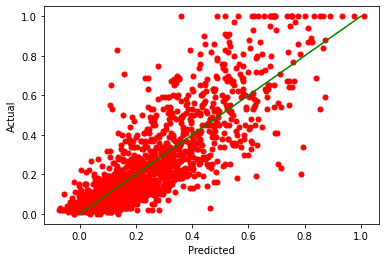

In [88]:
# Plot predicted against actual (in the training data)
%matplotlib inline
plt.plot(yHat, y_train,'ro', markersize=5)
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

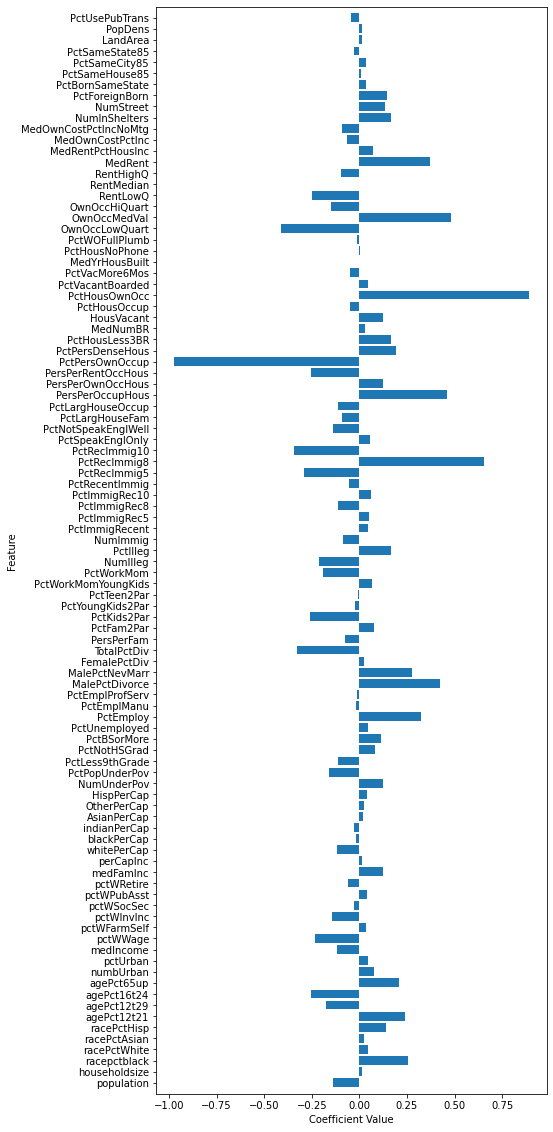

In [89]:
# The following function can be used to plot the model coefficients
%matplotlib inline



def plot_coefficients(weights, n_features, feature_names):
    #plt.rcParams["figure.figsize"] = (7,20)
    plt.figure(figsize=(7,20))
    plt.barh(range(n_features), weights, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

plot_coefficients(w.A.ravel(), len(X_train.columns), X_train.columns)

In [90]:
def cross_validate(X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        w = standRegres(X[X.index.isin(train)],y[y.index.isin(train)])
        yMat=np.mat(y[y.index.isin(train)])
        yHat = ((np.mat(X[X.index.isin(train)]))*w).A.ravel()
        err = abs(yHat - y[y.index.isin(train)])
        total_error = np.dot(err,err)
        rmse = np.sqrt(np.dot(err,err)/len(X[X.index.isin(train)]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [91]:
cross_validate(X_train, Y_train, 10, True)

Fold  1 RMSE: 0.1246
Fold  2 RMSE: 0.1255
Fold  3 RMSE: 0.1216
Fold  4 RMSE: 0.1245
Fold  5 RMSE: 0.1260
Fold  6 RMSE: 0.1254
Fold  7 RMSE: 0.1270
Fold  8 RMSE: 0.1279
Fold  9 RMSE: 0.1267
Fold 10 RMSE: 0.1265


0.12557351434398095

#### C) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation using only the selected features (See scikit-learn's metrics.neg_mean_absolute_error). In order to use cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.] As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition

In [92]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score, cross_validate

In [93]:
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(5, 101, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, Y_train)
    scores = cross_val_score(linreg, X_train_fs, Y_train, cv=5)
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

 5  0.5933
10  0.5993
15  0.6034
20  0.6151
25  0.6280
30  0.6329
35  0.6359
40  0.6386
45  0.6348
50  0.6327
55  0.6335
60  0.6334
65  0.6309
70  0.6299
75  0.6306
80  0.6323
85  0.6344
90  0.6322
95  0.6387
100  0.6400


In [94]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

19


Optimal percentile of features:96 

Optimal number of features:93 



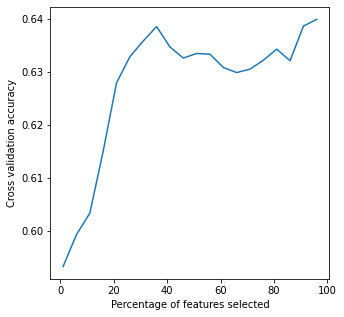

In [95]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(X_train.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
plt.figure(figsize=(5,5))
plt.xlabel("Percentage of features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(percentiles,results)

In [96]:
for i in range(len(X_train.columns.values)):
    if fs.get_support()[i]:
        print("%10s\t\t\t%3.2f" % (X_train.columns.values[i], fs.scores_[i]))

population			229.60
householdsize			2.93
racepctblack			992.16
racePctWhite			1304.88
racePctAsian			3.11
racePctHisp			132.07
agePct12t21			5.33
agePct12t29			36.42
agePct16t24			14.74
agePct65up			7.75
 numbUrban			223.62
  pctUrban			11.60
 medIncome			341.31
  pctWWage			170.55
pctWFarmSelf			48.60
pctWInvInc			761.06
pctWSocSec			22.07
pctWPubAsst			783.22
pctWRetire			11.19
 medFamInc			374.43
 perCapInc			214.97
whitePerCap			65.97
blackPerCap			122.12
indianPerCap			15.66
AsianPerCap			38.84
OtherPerCap			26.77
HispPerCap			105.56
NumUnderPov			361.96
PctPopUnderPov			569.49
PctLess9thGrade			296.03
PctNotHSGrad			461.06
PctBSorMore			169.04
PctUnemployed			532.36
 PctEmploy			196.38
PctEmplManu			1.08
PctEmplProfServ			9.10
MalePctDivorce			580.34
MalePctNevMarr			157.85
FemalePctDiv			693.86
TotalPctDiv			677.23
PersPerFam			27.99
PctFam2Par			1596.84
PctKids2Par			1901.30
PctYoungKids2Par			1269.98
PctTeen2Par			1231.32
PctWorkMomYoungKids			1.53
PctWorkMom			42.46
  NumIlle

As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.

In [97]:
linreg = LinearRegression()

# Train the model using the training set
linreg.fit(X_train,Y_train)
# Let's see predictions for the first 10 instances and compare to actual MEDV values
pred = linreg.predict(X_train)
yArr = np.array(Y_train)
for i in range(10):
    print("%2d \t %2.2f \t %2.2f" % (i, pred[i],yArr[i]))


 0 	 0.33 	 0.31
 1 	 0.26 	 0.05
 2 	 0.01 	 0.22
 3 	 -0.05 	 0.10
 4 	 0.27 	 0.31
 5 	 0.10 	 0.19
 6 	 0.34 	 0.52
 7 	 0.06 	 0.08
 8 	 0.22 	 0.22
 9 	 0.16 	 0.71


In [98]:
# First, let's compute errors on all training instances

p = linreg.predict(X_test) # p is the array of predicted values

# Now we can constuct an array of errors
err = abs(p-Y_test)

# Let's see the error on the first 10 predictions
print(err[:10])

1159    0.199120
1080    0.107321
1634    0.026302
1700    0.237067
1956    0.073282
1808    0.222419
137     0.141683
46      0.014871
1989    0.049865
4       0.047577
Name: ViolentCrimesPerPop, dtype: float64


In [99]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

# We can view the regression coefficients
print('Regression Coefficients: \n', linreg.coef_)

RMSE on Training Data:  0.13710537091581151
Regression Coefficients: 
 [-1.23274125e-01  6.75179555e-03  2.30380105e-01  1.19090859e-02
  2.23184672e-03  1.03141096e-01  1.74785968e-01 -2.95684337e-01
 -1.50353957e-01  1.06324388e-01  6.27284543e-02  4.18333159e-02
 -1.27178914e-01 -3.02481695e-01  3.17482567e-02 -1.82704491e-01
 -6.22150671e-02  2.04305861e-02 -7.86345616e-02  1.47145551e-01
  9.37761711e-03 -1.40064473e-01 -2.19732896e-02 -3.10570337e-02
  1.70178754e-02  2.84278945e-02  3.76389589e-02  1.52989956e-01
 -1.95656878e-01 -1.10977370e-01  6.88207406e-02  9.40507991e-02
  3.55343798e-02  2.87584105e-01 -1.93113730e-02 -1.39061270e-02
  3.62876056e-01  2.59733194e-01 -3.53559980e-02 -2.76849870e-01
 -6.68238876e-02  8.06394517e-02 -3.33432611e-01 -2.78871594e-02
 -9.79507415e-03  6.57579495e-02 -1.91489610e-01 -2.34402322e-01
  1.45490323e-01 -9.28827172e-02  4.29715572e-02  4.78269678e-02
 -1.04016599e-01  5.21765256e-02 -5.41566428e-02 -2.69720598e-01
  6.06306320e-01 -3

In [100]:
xArr = np.array(X_train.columns.values)
# Let's put some names to the faces

for i in range(len(X_train.columns)):
    print("%7s   %2.2f" % (xArr[i], linreg.coef_[i]))

population   -0.12
householdsize   0.01
racepctblack   0.23
racePctWhite   0.01
racePctAsian   0.00
racePctHisp   0.10
agePct12t21   0.17
agePct12t29   -0.30
agePct16t24   -0.15
agePct65up   0.11
numbUrban   0.06
pctUrban   0.04
medIncome   -0.13
pctWWage   -0.30
pctWFarmSelf   0.03
pctWInvInc   -0.18
pctWSocSec   -0.06
pctWPubAsst   0.02
pctWRetire   -0.08
medFamInc   0.15
perCapInc   0.01
whitePerCap   -0.14
blackPerCap   -0.02
indianPerCap   -0.03
AsianPerCap   0.02
OtherPerCap   0.03
HispPerCap   0.04
NumUnderPov   0.15
PctPopUnderPov   -0.20
PctLess9thGrade   -0.11
PctNotHSGrad   0.07
PctBSorMore   0.09
PctUnemployed   0.04
PctEmploy   0.29
PctEmplManu   -0.02
PctEmplProfServ   -0.01
MalePctDivorce   0.36
MalePctNevMarr   0.26
FemalePctDiv   -0.04
TotalPctDiv   -0.28
PersPerFam   -0.07
PctFam2Par   0.08
PctKids2Par   -0.33
PctYoungKids2Par   -0.03
PctTeen2Par   -0.01
PctWorkMomYoungKids   0.07
PctWorkMom   -0.19
NumIlleg   -0.23
PctIlleg   0.15
NumImmig   -0.09
PctImmigRecent   0.

#### d) Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [101]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        #print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [102]:
# Let's create an evenly spaced range of numbers in a specified interval
alpha = np.linspace(0.01, 100, 100)
alpha = np.array([int(e) for e in alpha])
print(alpha)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98 100]


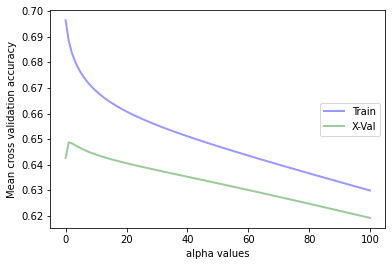

In [103]:
train_scores, test_scores = calc_params(X_train, Y_train, Ridge(alpha=alpha), alpha, 'alpha', 5)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.95002833660047, tolerance: 0.006718587717647059
  positive)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization 

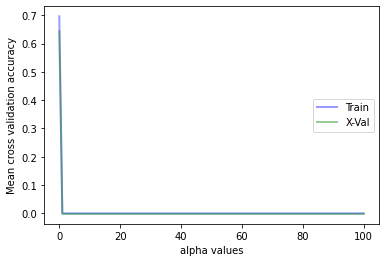

In [104]:
#lasso
alpha = np.linspace(0.01, 100, 100)
alpha = np.array([int(e) for e in alpha])

train_scores, test_scores = calc_params(X_train, y_train,Lasso(alpha=alpha), alpha, 'alpha', 5)

In [105]:
a = 0.01
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(alpha=a)),
        ('ridge', Ridge(alpha=a)),
        ('elastic-net', ElasticNet(alpha=a))
        ]:
    
    # computing the RMSE on training data
    met.fit(X_train, Y_train)
    p = met.predict(X_train)
    e = p-Y_train
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    # computing the RMSE for x-validation
    #rmse_10cv = cross_validate(met, X_train, Y_train, 10)
    
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    #print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print("\n")

Method: linear regression
RMSE on training: 0.1275


Method: lasso
RMSE on training: 0.1534


Method: ridge
RMSE on training: 0.1275


Method: elastic-net
RMSE on training: 0.1441




#### e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a brief summary of your findings from the above experiments.

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_s = scaler.transform(X_train)
scaler.fit(X_train)


from sklearn import feature_selection
#from sklearn.cross_validation import train_test_split
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_s, Y_train, test_size=0.2, random_state=35)




In [107]:
from sklearn.model_selection import GridSearchCV
sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.0001, 1, 100),
}

grid_search = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)
print(grid_search.fit(x_train_s, y_train_s))


best_params = grid_search.best_params_
best_params, grid_search.best_score_


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, ver...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished


({'alpha': 0.15159999999999998, 'penalty': 'l2'}, 0.6375118158089081)

## 2 . Automatic Document Clustering [Dataset: newsgroups5.zip]
For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

a) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [108]:
def cosD(x, d):
    normX = np.linalg.norm(x)
    normD = np.linalg.norm(d)
    similarity = np.dot(x,d)/(normX * normD)
    distance = 1 - similarity
    return distance

b) Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.


In [109]:
MatData = pd.DataFrame(np.genfromtxt ("./newsgroups5/matrix.txt", delimiter=",", dtype = int).T)
MatData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
classesData = pd.DataFrame(np.genfromtxt("./newsgroups5/classes.txt", delimiter=' ',dtype=int,skip_header=1))
classesData

,0,1
0,0,0
1,1,1
2,2,1
3,3,1
4,4,2
...,...,...
2495,2495,4
2496,2496,4
2497,2497,3
2498,2498,4


In [111]:
TermData = (np.genfromtxt ("./newsgroups5/terms.txt", delimiter="\t", dtype = str))
TermData

array(['aa', 'aargh', 'aaron', ..., 'zw', 'zx', 'zz'], dtype='<U30')

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(MatData, classesData, test_size = 0.2, random_state = 33)


c) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster.]

In [113]:
'''
k Means Clustering for Ch10 of Machine Learning in Action
@author: Peter Harrington
'''
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

def kMeans(dataSet, k, distMeas=distEuclid, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=distEuclid):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1]) #compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0] #replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss #reassign new clusters, and SSE
    return mat(centList), clusterAssment



In [114]:
numterms =10
XtrainArr = np.array(x_train)
centroids_tfidf, clusters_tfidf = kMeans(DT_tfidf_train, 5)
for i in range(5):
    print("Cluster", i+1, ":")
    cluster_term = XtrainArr[clusters_tfidf[:,0]==i]
    print("Number of documents in Cluster", cluster_term.shape[0])
    cluster_doc_freq = np.array([(cluster_term.T!=0).sum(1)]).T
    term_doc_cluster = cluster_doc_freq/float(cluster_term.shape[0])
    term_doc_cluster = map(list, term_doc_cluster)
    term_doc_cluster = [elem[0] for elem in term_doc_cluster]
    cluster_doc_freq = [elem[0] for elem in cluster_doc_freq]
    a=sorted(zip(TermData, cluster_doc_freq, term_doc_cluster),key=lambda x:x[2],reverse=True) #Sort in decreasing order
    print('Word: ' , '\tFrequency: ', '\t% ')
    for elem in a[:numterms]:
        print(elem[0], "\t" ,elem[1],  "\t\t", elem[2]*100)
    print('\n')

Cluster 1 :
Number of documents in Cluster 1994
Word:  	Frequency:  	% 
subject 	 1994 		 100.0
write 	 960 		 48.144433299899696
on 	 774 		 38.81644934804413
articl 	 720 		 36.10832497492478
know 	 585 		 29.33801404212638
get 	 582 		 29.187562688064194
just 	 549 		 27.53259779338014
think 	 508 		 25.47642928786359
time 	 469 		 23.520561685055167
go 	 444 		 22.26680040120361


Cluster 2 :
Number of documents in Cluster 2
Word:  	Frequency:  	% 
asq 	 2 		 100.0
asqq 	 2 		 100.0
ax 	 2 		 100.0
bhj 	 2 		 100.0
bhjbhjn 	 2 		 100.0
bhjbiz 	 2 		 100.0
bhjkn 	 2 		 100.0
bhjn 	 2 		 100.0
bj 	 2 		 100.0
bwm 	 2 		 100.0


Cluster 3 :
Number of documents in Cluster 2
Word:  	Frequency:  	% 
asq 	 2 		 100.0
asqq 	 2 		 100.0
ax 	 2 		 100.0
bhj 	 2 		 100.0
bhjbhjkn 	 2 		 100.0
bhjbiz 	 2 		 100.0
bhjbj 	 2 		 100.0
bhjkn 	 2 		 100.0
bhjn 	 2 		 100.0
biz 	 2 		 100.0


Cluster 4 :
Number of documents in Cluster 1
Word:  	Frequency:  	% 
asf 	 1 		 100.0
asq 	 1 		 100.0
asqq 

d) Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [115]:
from sklearn.metrics import completeness_score, homogeneity_score
centroids_tfidf, clusters_tfidf = kMeans(XtrainArr, 3)
clusters = clusters_tfidf.T[0]
clusters = clusters.astype(int)
y_train2 = np.array(y_train)
y_train2.shape
completeness = completeness_score(np.array(y_train2.T)[0],clusters)
homogeneity = homogeneity_score(np.array(y_train2.T)[0],clusters)

print("Completeness: ", completeness)
print("Homogeneity: ", homogeneity)

Completeness:  1.00000000000002
Homogeneity:  0.0029381336082044763


e)Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [116]:
x_test_np = x_test.to_numpy()
x_test[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
1590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
preds = {}
npX = x_train.to_numpy()
centroids, clusters = kMeans(npX, 5, cosD, randCent)
cosDmat= 1 - cosD(npX,centroids.T)
cosDmat

array([[1.48197165e-08, 6.62229616e-09, 1.98668885e-08, 1.86919650e-08,
        1.24977168e-08],
       [2.23566008e-08, 1.10371602e-08, 2.45970999e-08, 1.77717451e-08,
        2.32029324e-08],
       [3.53556092e-08, 6.62229616e-09, 4.91941999e-08, 3.20762334e-08,
        2.48460584e-08],
       ...,
       [7.66365645e-07, 2.00876316e-07, 1.67449488e-07, 1.53865682e-07,
        2.52460518e-07],
       [6.05999376e-08, 6.62229616e-09, 7.00071306e-08, 6.28214346e-08,
        3.48707875e-08],
       [6.64516084e-08, 6.62229616e-09, 1.41906346e-08, 2.54703698e-08,
        2.91447420e-08]])

In [122]:
for i in range(len(cosDmat)):
    m = np.argmax(cosDmat[i])
    preds.update({i:(m,ravel(cosDmat[i])[m])})
    print("Cluster predicted: {}, Cosine Similarity: {}".format(preds[i][0], preds[i][1]))

Cluster predicted: 2, Cosine Similarity: 1.986688846766782e-08
Cluster predicted: 2, Cosine Similarity: 2.4597099912426756e-08
Cluster predicted: 2, Cosine Similarity: 4.9194199935875815e-08
Cluster predicted: 2, Cosine Similarity: 4.162586142442137e-08
Cluster predicted: 0, Cosine Similarity: 6.479180025831255e-08
Cluster predicted: 0, Cosine Similarity: 2.16181554990591e-07
Cluster predicted: 3, Cosine Similarity: 1.1005664624086364e-07
Cluster predicted: 0, Cosine Similarity: 2.0249660537263736e-07
Cluster predicted: 0, Cosine Similarity: 2.2424348045113618e-08
Cluster predicted: 2, Cosine Similarity: 8.419776520440792e-08
Cluster predicted: 0, Cosine Similarity: 5.4121604420309666e-08
Cluster predicted: 4, Cosine Similarity: 2.508007945767332e-07
Cluster predicted: 3, Cosine Similarity: 8.22857268989452e-08
Cluster predicted: 0, Cosine Similarity: 1.803771200181714e-07
Cluster predicted: 0, Cosine Similarity: 6.677340802507814e-08
Cluster predicted: 0, Cosine Similarity: 1.47011587

Cluster predicted: 3, Cosine Similarity: 8.541611751233802e-08
Cluster predicted: 0, Cosine Similarity: 1.5219425353318883e-07
Cluster predicted: 4, Cosine Similarity: 4.033127731783992e-08
Cluster predicted: 4, Cosine Similarity: 1.354500220873689e-07
Cluster predicted: 4, Cosine Similarity: 7.256310463610305e-08
Cluster predicted: 0, Cosine Similarity: 7.766378251616857e-08
Cluster predicted: 0, Cosine Similarity: 2.707350477137993e-08
Cluster predicted: 1, Cosine Similarity: 0.48605995804225044
Cluster predicted: 4, Cosine Similarity: 1.0660403038098565e-07
Cluster predicted: 0, Cosine Similarity: 3.6913796574999935e-08
Cluster predicted: 3, Cosine Similarity: 2.78037842749157e-08
Cluster predicted: 0, Cosine Similarity: 2.2830831669651275e-08
Cluster predicted: 0, Cosine Similarity: 6.900059967840377e-08
Cluster predicted: 2, Cosine Similarity: 1.5420489596351672e-07
Cluster predicted: 0, Cosine Similarity: 3.1727742622056354e-07
Cluster predicted: 0, Cosine Similarity: 4.086854377

In [123]:
yTpred = [np.argmax(cosDmat[i]) for i in range(len(cosDmat))]
yTpred = np.array(yTpred)
c=[]
for i in range(0,5):
    c.append(len(np.where(yTpred == i)[0]))
    print("Predicted cluster",i,c[i])

Predicted cluster 0 949
Predicted cluster 1 33
Predicted cluster 2 460
Predicted cluster 3 188
Predicted cluster 4 370
